Please upload your kaggle.json file


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/biaiscience/dogs-vs-cats
License(s): DbCL-1.0
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)
Verifying dataset structure:
['train', 'test']
['cat.7136.jpg', 'dog.5675.jpg', 'cat.8463.jpg', 'cat.11990.jpg', 'cat.4554.jpg', 'dog.9221.jpg', 'dog.6207.jpg', 'dog.8993.jpg', 'dog.11739.jpg', 'cat.1372.jpg', 'cat.6331.jpg', 'dog.666.jpg', 'cat.7085.jpg', 'dog.4482.jpg', 'dog.10104.jpg', 'dog.10955.jpg', 'cat.9595.jpg', 'dog.12303.jpg', 'cat.6473.jpg', 'cat.11992.jpg', 'cat.5942.jpg', 'cat.339.jpg', 'dog.3026.jpg', 'cat.2309.jpg', 'dog.4381.jpg', 'dog.7550.jpg', 'dog.1772.jpg', 'cat.6944.jpg', 'cat.9148.jpg', 'cat.2861.jpg', 'dog.11795.jpg', 'cat.1638.jpg', 'dog.1285.jpg', 'cat.10755.jpg', 'cat.7325.jpg', 'cat.5347.jpg', 'cat.1960.jpg', 'cat.7595.jpg', 'cat.5763.jpg', 'dog.2408.jpg', 'cat.8762.jpg', 'cat.2229.jpg', 'cat.12112.jpg', 'dog.5691.jpg', 'cat.419.jpg', '

<ipython-input-15-d8c7a18970ad>:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y, palette="coolwarm", edgecolor="black")


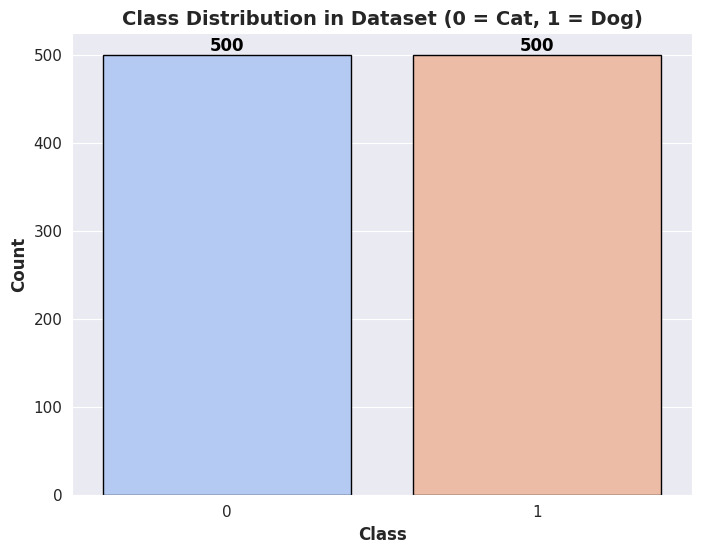

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import cv2
import os
from google.colab import files
import zipfile

print("Please upload your kaggle.json file")
uploaded = files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d biaiscience/dogs-vs-cats
with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

print("Verifying dataset structure:")
print(os.listdir('dataset'))

if os.path.exists('dataset/train/train'):
    print(os.listdir('dataset/train/train'))
else:
    print("Error: 'dataset/train/train' directory not found!")

def load_and_preprocess_images(directory, num_images=None):
    images = []
    labels = []
    cat_count = 0
    dog_count = 0

    if not os.path.exists(directory):
        raise FileNotFoundError(f"Directory {directory} not found!")

    print(f"Scanning directory: {directory}")
    for filename in os.listdir(directory):

        if not filename.endswith(('.jpg', '.jpeg', '.png')) or filename.startswith('.'):
            continue

        if num_images is not None and cat_count >= num_images//2 and dog_count >= num_images//2:
            break

        if filename.startswith('cat') and (num_images is None or cat_count < num_images//2):
            img_path = os.path.join(directory, filename)
            try:
                if os.path.exists(img_path):
                    img = cv2.imread(img_path)
                    if img is not None:
                        img = cv2.resize(img, (64, 64))
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                        img = img.flatten()
                        images.append(img)
                        labels.append(0)
                        cat_count += 1
                    else:
                        print(f"Failed to load image: {img_path}")
                else:
                    print(f"File not found: {img_path}")
            except Exception as e:
                print(f"Error processing {img_path}: {str(e)}")

        elif filename.startswith('dog') and (num_images is None or dog_count < num_images//2):
            img_path = os.path.join(directory, filename)
            try:
                if os.path.exists(img_path):
                    img = cv2.imread(img_path)
                    if img is not None:
                        img = cv2.resize(img, (64, 64))
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                        img = img.flatten()
                        images.append(img)
                        labels.append(1)
                        dog_count += 1
                    else:
                        print(f"Failed to load image: {img_path}")
                else:
                    print(f"File not found: {img_path}")
            except Exception as e:
                print(f"Error processing {img_path}: {str(e)}")

    print(f"Loaded {len(images)} images: {cat_count} cats, {dog_count} dogs")
    if len(images) == 0:
        raise ValueError(f"No images loaded from directory {directory}. Check file paths and contents.")

    return np.array(images), np.array(labels)

print("Loading and preprocessing images...")
try:
    X, y = load_and_preprocess_images('dataset/train/train', num_images=1000)
except Exception as e:
    print(f"Error loading images: {str(e)}")
    raise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")

ax = sns.countplot(x=y, palette="coolwarm", edgecolor="black")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.title('Class Distribution in Dataset (0 = Cat, 1 = Dog)', fontsize=14, fontweight='bold')
plt.xlabel('Class', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()


Training SVM model...
Accuracy: 55.50%

Classification Report:
              precision    recall  f1-score   support

         Cat       0.50      0.58      0.53        88
         Dog       0.62      0.54      0.57       112

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.55       200
weighted avg       0.56      0.56      0.56       200



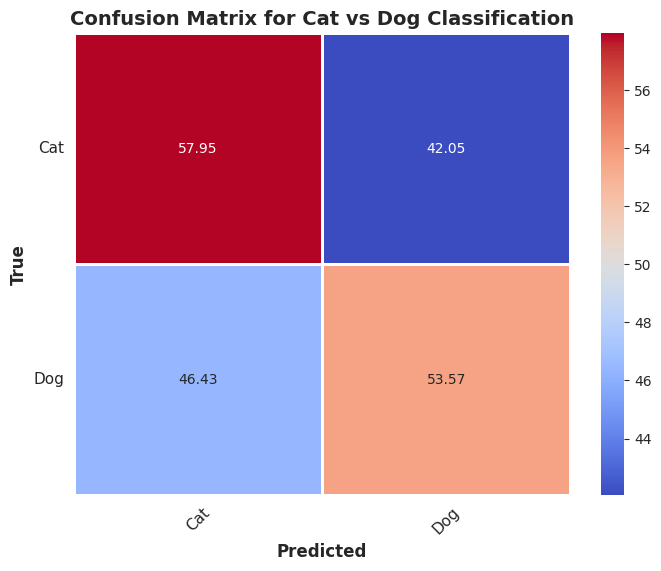

In [16]:
print("Training SVM model...")
svm_classifier = svm.SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Cat', 'Dog']))

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")

ax = sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="coolwarm", linewidths=2,
                 xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])

plt.title('Confusion Matrix for Cat vs Dog Classification', fontsize=14, fontweight='bold')
plt.xlabel('Predicted', fontsize=12, fontweight='bold')
plt.ylabel('True', fontsize=12, fontweight='bold')

plt.xticks(fontsize=11, rotation=45)
plt.yticks(fontsize=11, rotation=0)

plt.show()



Sample predictions (10 examples):


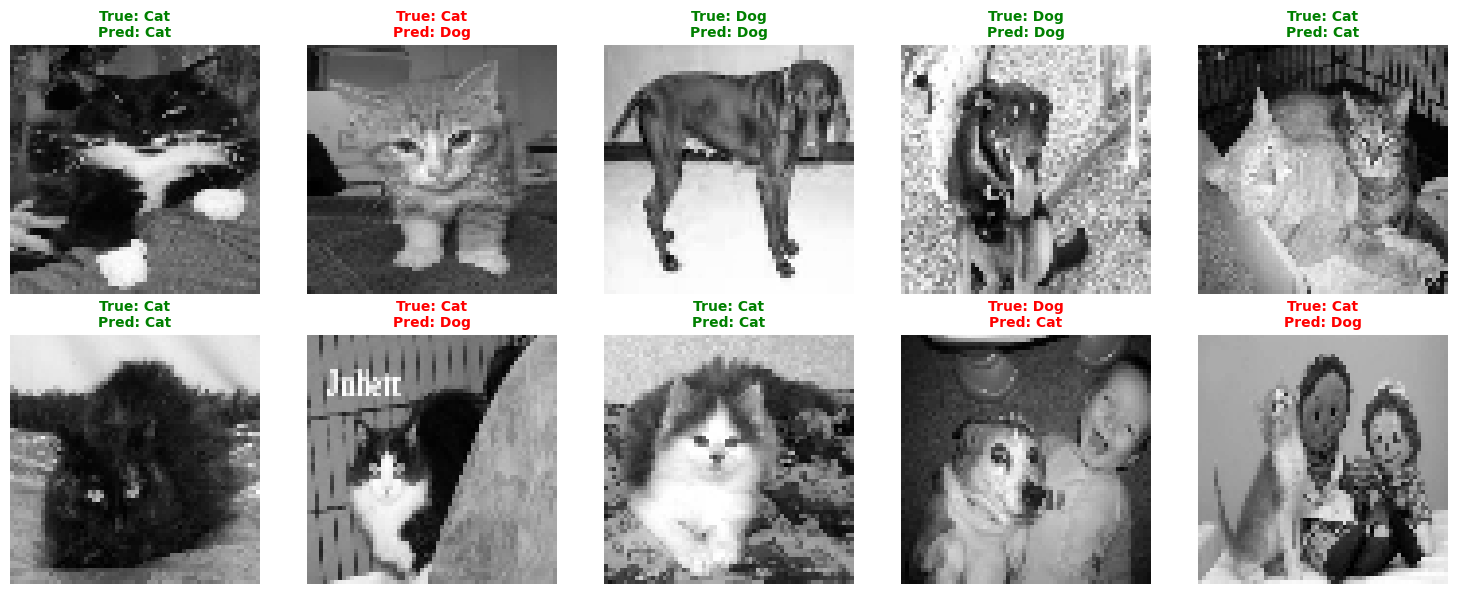

In [17]:
def plot_sample_predictions(X_test, y_test, y_pred, num_samples=10):
    plt.figure(figsize=(15, 6))
    sns.set_style("darkgrid")

    for i in range(min(num_samples, len(X_test))):
        plt.subplot(2, 5, i+1)

        img = X_test[i].reshape(64, 64)
        correct = y_test[i] == y_pred[i]
        title_color = "green" if correct else "red"

        plt.imshow(img, cmap='gray')
        plt.title(f"True: {['Cat','Dog'][y_test[i]]}\nPred: {['Cat','Dog'][y_pred[i]]}",
                  fontsize=10, fontweight='bold', color=title_color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

print("Sample predictions (10 examples):")
plot_sample_predictions(X_test, y_test, y_pred, num_samples=10)


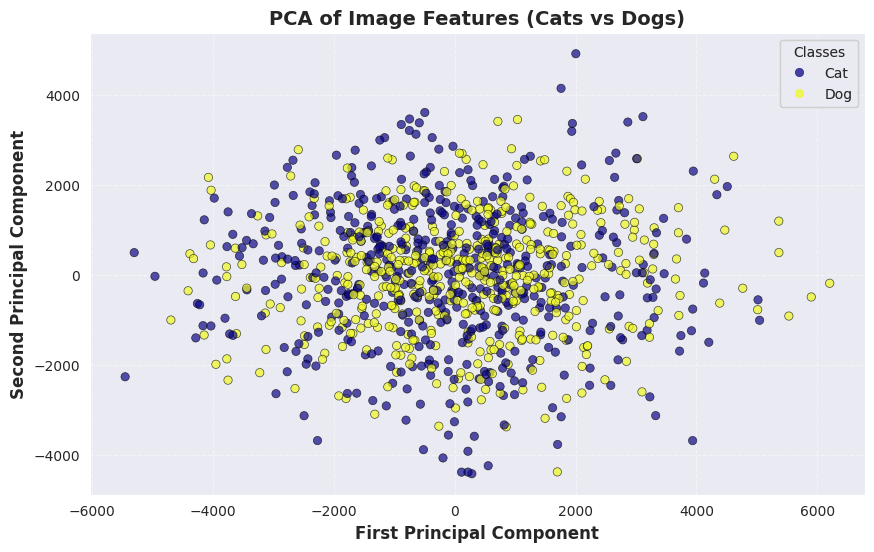

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='plasma', alpha=0.7, edgecolors="k", linewidth=0.5)

plt.title('PCA of Image Features (Cats vs Dogs)', fontsize=14, fontweight='bold')
plt.xlabel('First Principal Component', fontsize=12, fontweight='bold')
plt.ylabel('Second Principal Component', fontsize=12, fontweight='bold')

legend_labels = ['Cat', 'Dog']
legend1 = plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Classes", fontsize=10)
plt.gca().add_artist(legend1)

plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


Explained variance ratio by PCA components: 20.00% | 11.88%


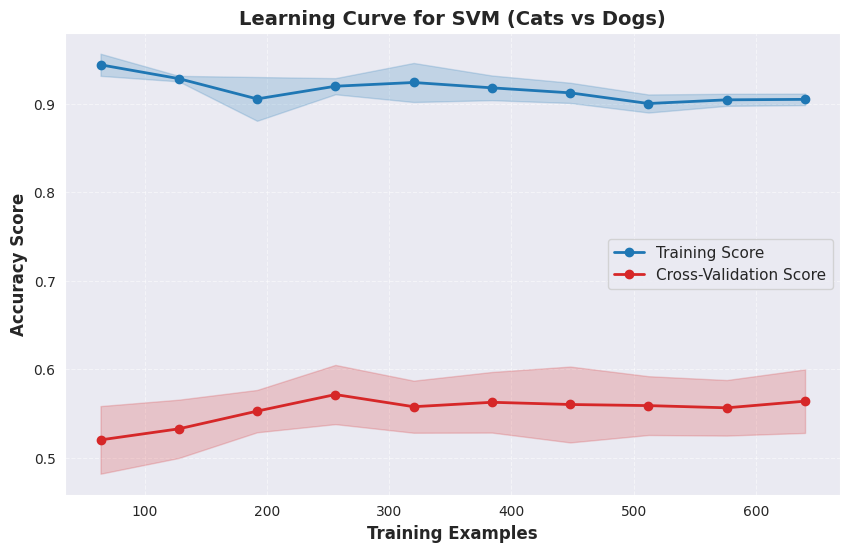

In [14]:
explained_variance = pca.explained_variance_ratio_ * 100
print(f"Explained variance ratio by PCA components: {explained_variance[0]:.2f}% | {explained_variance[1]:.2f}%")
train_sizes, train_scores, test_scores = learning_curve(svm_classifier, X_train, y_train, cv=5, n_jobs=-1,
                                                       train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

plt.plot(train_sizes, train_mean, 'o-', label='Training Score', color='#1f77b4', linewidth=2)
plt.plot(train_sizes, test_mean, 'o-', label='Cross-Validation Score', color='#d62728', linewidth=2)

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#1f77b4', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#d62728', alpha=0.2)

plt.xlabel('Training Examples', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy Score', fontsize=12, fontweight='bold')
plt.title('Learning Curve for SVM (Cats vs Dogs)', fontsize=14, fontweight='bold')

plt.legend(loc='best', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()
